In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.datasets import mnist

In [ ]:
#!pip install tensorflow==2.10.0

In [ ]:
#Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [ ]:
X_train_digit[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

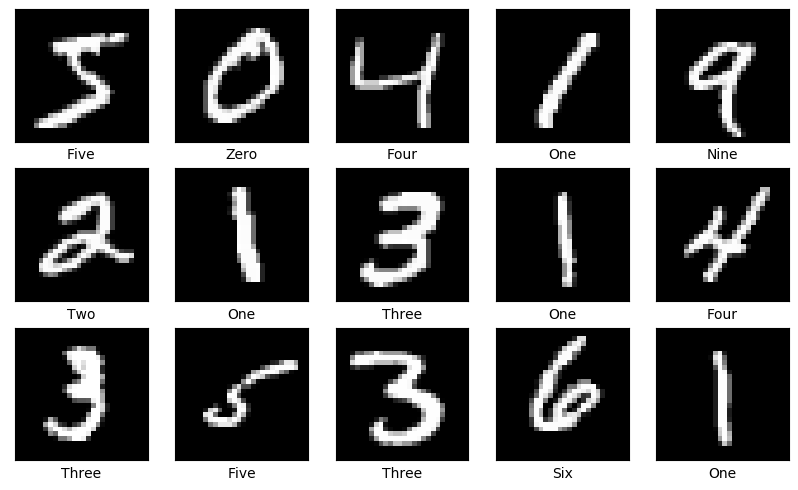

In [ ]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [ ]:
X_train_digit.shape

(60000, 28, 28)

In [ ]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [ ]:
X_train_digit.shape

(60000, 784)

In [ ]:
y_test_digit.shape

(10000,)

In [51]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)


In [ ]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

In [ ]:
#param_number = output_channel_number * (input_channel_number + 1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222218 (868.04 KB)
Trainable params: 222218 (868.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Compiling the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])

In [ ]:
y_train_digit.shape

(60000,)

In [ ]:
X_train_digit.shape

(60000, 784)

In [3]:
# Compile the model first
from tensorflow.keras.datasets import mnist
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()
X_train_digit = X_train_digit / 255.0
X_test_digit = X_test_digit / 255.0
print(X_train_digit.shape)  # (60000, 28, 28)
print(y_train_digit.shape)  # (60000,)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    X_train_digit,
    y_train_digit,
    batch_size=100,
    epochs=10,
    validation_data=(X_test_digit, y_test_digit)
)

(60000, 28, 28)
(60000,)
Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.3333 - accuracy: 0.9082 - val_loss: 0.1774 - val_accuracy: 0.9505
Epoch 2/10
600/600 [==============================] - 3s 4ms/step - loss: 0.1532 - accuracy: 0.9564 - val_loss: 0.1289 - val_accuracy: 0.9627
Epoch 3/10
600/600 [==============================] - 3s 4ms/step - loss: 0.1098 - accuracy: 0.9683 - val_loss: 0.1067 - val_accuracy: 0.9673
Epoch 4/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0852 - accuracy: 0.9754 - val_loss: 0.0903 - val_accuracy: 0.9724
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0684 - accuracy: 0.9798 - val_loss: 0.0884 - val_accuracy: 0.9737
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0573 - accuracy: 0.9831 - val_loss: 0.0874 - val_accuracy: 0.9731
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0462 - accuracy: 0.9865 - val_loss: 0.0809 - va

In [ ]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)


313/313 [==============================] - 1s 3ms/step


In [ ]:
y_predict[0]

array([1.0000000e+00, 1.3155604e-20, 8.8118452e-17, 9.4036442e-01,
       1.0000000e+00, 1.0000000e+00, 1.9973165e-27, 3.4118546e-24,
       7.3629358e-25, 1.0000000e+00], dtype=float32)

In [ ]:
y_predicts

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
pip install confusion_matrix

  Using cached confusion_matrix-0.1.tar.gz (1.9 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached nose-1.3.7-py3-none-any.whl.metadata (1.7 kB)
Using cached nose-1.3.7-py3-none-any.whl (154 kB)
  Created wheel for confusion_matrix: filename=confusion_matrix-0.1-py3-none-any.whl size=2447 sha256=b4fafb99d7bedf6aa38c1257883b2ba6395d981291426a079cf5865d2528ce42
  Stored in directory: c:\users\balaji murugan\appdata\local\pip\cache\wheels\2a\86\a7\df011be982e86cf5084b4e47b183f46b0773f928abb5c12adb
Successfully built confusion_matrix

   ---------------------------------------- 0/2 [nose]
   ---------------------------------------- 0/2 [nose]
   ---------------------------------------- 0/2 [nose]


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       980
           1       0.63      0.99      0.77      1135
           2       0.68      0.88      0.77      1032
           3       0.39      0.37      0.38      1010
           4       0.97      0.94      0.96       982
           5       0.64      0.50      0.56       892
           6       0.94      0.47      0.63       958
           7       0.97      0.92      0.94      1028
           8       0.91      0.81      0.86       974
           9       0.95      0.84      0.89      1009

    accuracy                           0.78     10000
   macro avg       0.80      0.77      0.77     10000
weighted avg       0.80      0.78      0.77     10000



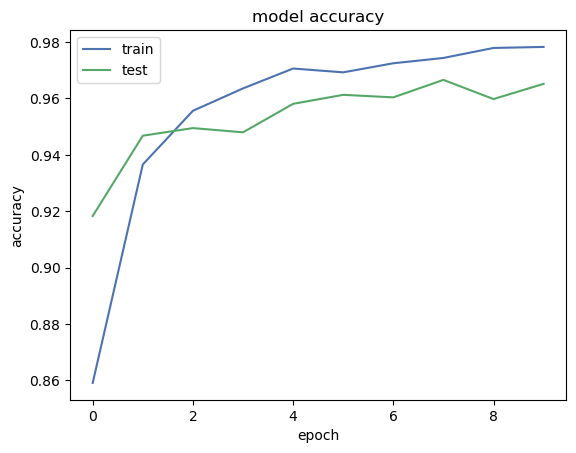

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


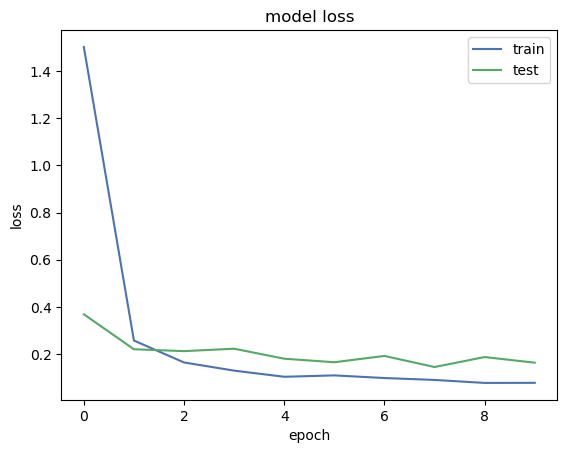

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [27]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector

1/1 [==============================] - 0s 30ms/step


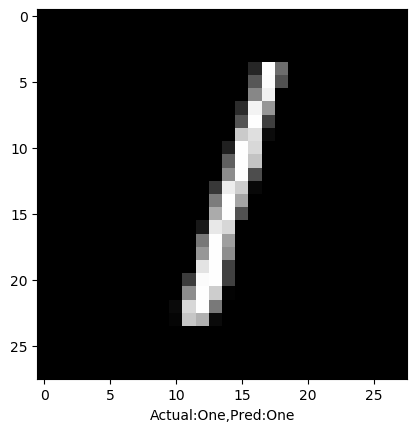

In [ ]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()

Accuracy: 0.9688


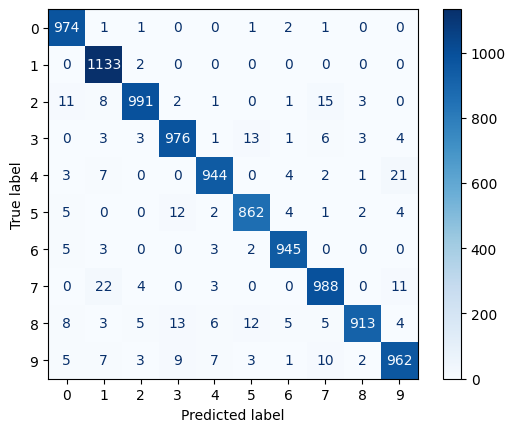

In [47]:
# 1. Imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Flatten images: 28x28 → 784
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()


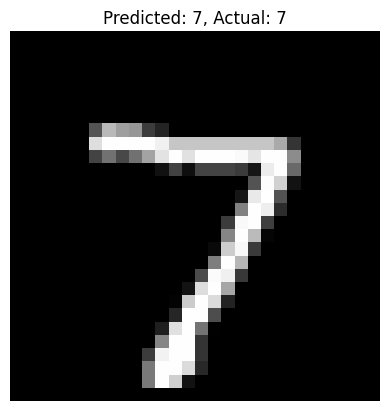

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

index = 0
plt.imshow(X_test[index].reshape(28, 28), cmap="gray")
plt.title(f"Predicted: {y_pred[index]}, Actual: {y_test[index]}")
plt.axis("off")
plt.show()
